In [1]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
companies = pd.read_csv('../Dataset/stock_prices/tickers.csv')

In [3]:
company_tickers = " ".join(companies.Symbol.values)

In [4]:
company_tickers

'MMM AOS ABT ABBV ACN ATVI ADM ADBE ADP AAP AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY BKR BALL BAC BBWI BAX BDX WRB BRK.B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF.B CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DAL XRAY DVN DXCM FANG DLR DFS DISH DIS DG DLTR D DPZ DOV DOW DTE DUK DD DXC EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS ETSY RE EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FAST FRT FDX FITB FRC FSLR FE FIS FISV FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEN GNRC GD GE GIS GM GPC GILD GPN GL GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HON HRL HST HWM HPQ HUM HBAN H

In [5]:
# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(company_tickers, start_date, end_date).Open

[*********************100%***********************]  503 of 503 completed

4 Failed downloads:
- FRC: Data doesn't exist for startDate = 1577854800, endDate = 1672549200
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- SIVB: No timezone found, symbol may be delisted


In [6]:
data = data.drop(["BF.B", "BRK.B"], axis=1)

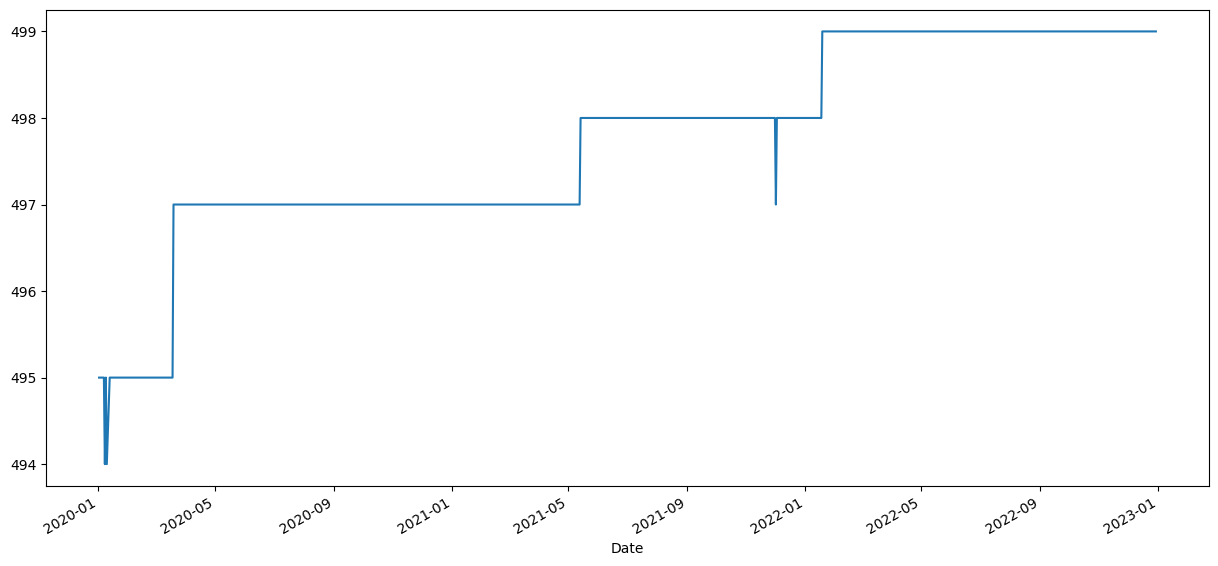

In [7]:
data.T.count().plot(figsize=(15,7))
plt.show()

In [8]:
havena = data.T[data.isna().any()].index.values
data = data.drop(havena, axis=1)


In [9]:
data.isna().sum().sum()

0

No hay datos NaN

In [10]:
train_data_finance = data

In [11]:
train_data_finance.index = pd.to_datetime(train_data_finance.index)

In [12]:
train_data_finance = train_data_finance.groupby(train_data_finance.index.to_period("M")).mean() # Group by month

In [14]:
PREDICTION_STEP=5

In [15]:
X, y = train_data_finance.iloc[:-PREDICTION_STEP].T, train_data_finance.iloc[-PREDICTION_STEP:].T
X.to_pickle('../Dataset/preprocessed/finance/X_raw.pkl')
y.to_pickle('../Dataset/preprocessed/finance/y_raw.pkl')

In [25]:
current_month_price = train_data_finance.iloc[1:].T
previous_month_price = train_data_finance.shift(1).iloc[1:].T
train_data_finance = pd.DataFrame((current_month_price.values - previous_month_price.values)/previous_month_price.values, index=current_month_price.index, columns=current_month_price.columns)
train_data_finance.columns.name = ''

In [28]:
X, y = train_data_finance.T.iloc[:-PREDICTION_STEP].T, train_data_finance.T.iloc[-PREDICTION_STEP:].T
X.columns.name = ''
y.columns.name = ''

In [31]:
X.to_pickle('../Dataset/preprocessed/finance/X_diff.pkl')
y.to_pickle('../Dataset/preprocessed/finance/y_diff.pkl')

In [34]:
current_month_price.T.iloc[-PREDICTION_STEP:].T.to_pickle('../Dataset/preprocessed/finance/y_raw.pkl')
previous_month_price.T.iloc[-PREDICTION_STEP:].T.to_pickle('../Dataset/preprocessed/finance/previous_month_raw.pkl')